<a href="https://colab.research.google.com/github/KunalAyush1/CS229_learning/blob/main/NeuralNetworkCS229.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [3]:
def sigmoid_derivative(x):
  s = sigmoid(x)
  return s * (1 - s)

In [4]:
def binary_cross_entropy(y_true, y_pred):
  epsilon = 1e-8
  return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

In [5]:
def binary_cross_entropy_der(y_true, y_pred):
  epsilon = 1e-8
  return -np.mean(y_pred - y_true) / (y_pred + epsilon) * (1 - y_pred + epsilon)

In [6]:
def initialise_parameters(input_size):
  np.random.seed(1)

  return{
      "W1": np.random.randn(3, input_size) * 0.01,
      "b1": np.zeros((3,1)),
      "W2": np.random.randn(2,3) * 0.01,
      "b2": np.zeros((2,1)),
      "W3": np.random.randn(1,2) * 0.01,
      "b3": np.zeros((1,1))



         }

In [8]:
def forward(X , params):
  Z1 = np.dot(params["W1"],X) + params["b1"]
  A1 = sigmoid(Z1)

  Z2 = np.dot(params["W2"],A1) + params["b2"]
  A2 = sigmoid(Z2)

  Z3 = np.dot(params["W3"],A2) + params['b3']
  A3 = sigmoid(Z3)

  cache = { "Z1": Z1 , "A1": A1 , "Z2": Z2, "A2": A2, "Z3": Z3, "A3":A3}

  return A3,cache

In [39]:
def backward(X,Y,params,cache):
  m = X.shape[1]

  A1 , A2 , A3 = cache["A1"] , cache["A2"] , cache["A3"]
  Z1 , Z2 , Z3 = cache["Z1"] , cache["Z2"] , cache["Z3"]

  dZ3 = A3 - Y
  dW3 = np.dot(dZ3, A2.T)
  db3 = np.sum(dZ3, axis=1, keepdims=True)

  dZ2 = np.dot(params["W3"].T, dZ3) * sigmoid_derivative(Z2)
  dW2 = np.dot(dZ2, A1.T)
  db2 = np.sum(dZ2, axis=1, keepdims=True)

  dZ1 = np.dot(params["W2"].T, dZ2) * sigmoid_derivative(Z1)
  dW1 = np.dot(dZ1, X.T)
  db1 = np.sum(dZ1, axis=1, keepdims=True)

  grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}

  return grads

  return grads

In [40]:
def update_params(params, grads , learning_rate):
  for key in params:
    params[key] = params[key] - learning_rate * grads["d" + key]
  return params

In [41]:
def training(X , Y , epochs = 1000 , learning_rate = 0.01):
  input_size = X.shape[0]
  params = initialise_parameters(input_size)
  for epoch in range(epochs):
    A3 , cache = forward(X,params)
    loss = binary_cross_entropy(Y,A3)
    grads = backward(X,Y,params,cache)
    params = update_params(params,grads,learning_rate)

    if epoch % 100 == 0:
      print(f"Epoch {epoch} - Loss:{loss:.4f}")

  return params

In [59]:
def predict(X ,Y, params):
  A3 , _ = forward(X,params)
  predictions = (A3 > 0.5).astype(int)
  accuracy = np.mean(predictions == Y)
  print(f"Accuracy: {accuracy * 100:.2f}%")
  return predictions

In [60]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def load_dataset():
  train_dataset = h5py.File("train_catvnoncat.h5","r")
  test_dataset = h5py.File("test_catvnoncat.h5","r")
  train_x_orig = np.array(train_dataset["train_set_x"][:])
  train_y_orig = np.array(train_dataset["train_set_y"][:])
  test_x_orig = np.array(test_dataset["test_set_x"][:])
  test_y_orig = np.array(test_dataset["test_set_y"][:])

  classes = np.array(test_dataset["list_classes"][:])

  return train_x_orig , train_y_orig , test_x_orig , test_y_orig , classes



In [62]:
train_x_orig , train_y_orig , test_x_orig , test_y_orig , classes = load_dataset()

print(train_x_orig.shape)
print(train_y_orig.shape)
print(test_x_orig.shape)
print(test_y_orig.shape)
print(classes)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)
[b'non-cat' b'cat']


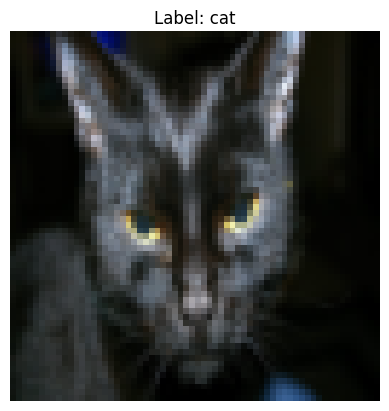

In [63]:
index = 25
plt.imshow(train_x_orig[index])
plt.title(f"Label: {classes[train_y_orig[index]].decode()}")
plt.axis('off')
plt.show()

In [64]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255.0
test_x = test_x_flatten / 255.0

train_y = train_y_orig.reshape(1, train_y_orig.shape[0])
test_y = test_y_orig.reshape(1, test_y_orig.shape[0])

In [65]:
print(train_x.shape)
print(test_y.shape)

(12288, 209)
(1, 50)


In [66]:
trained_params = training(train_x , train_y , epochs = 1000 , learning_rate = 0.01)

Epoch 0 - Loss:0.6933
Epoch 100 - Loss:0.6412
Epoch 200 - Loss:0.6276
Epoch 300 - Loss:0.5870
Epoch 400 - Loss:0.5750
Epoch 500 - Loss:0.4514
Epoch 600 - Loss:0.5992
Epoch 700 - Loss:0.5134
Epoch 800 - Loss:0.5839
Epoch 900 - Loss:0.6240


In [68]:
train_preds = predict(train_x ,train_y, trained_params)
test_preds = predict(test_x ,test_y, trained_params)

Accuracy: 65.55%
Accuracy: 34.00%


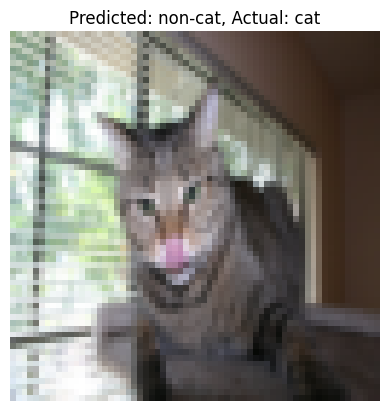

In [82]:
import matplotlib.pyplot as plt

index = 20


plt.imshow(test_x_orig[index])


actual_index = test_y_orig[0, index] if test_y_orig.ndim == 2 else test_y_orig[index]
actual_label = classes[actual_index].decode("utf-8")


predicted_label = "cat" if test_preds[0, index] == 1 else "non-cat"


plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()